#Analysis

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = yf.download("META")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2023-07-03  286.700012  289.399994  284.850006  286.019989  286.019989   
2023-07-05  287.649994  298.119995  286.359985  294.369995  294.369995   
2023-07-06  295.890015  298.119995  291.309998  291.989990  291.989990   
2023-07-07  292.179993  296.200012  288.660004  290.529999  290.529999   
2023-07-10  295.549988  298.130005  287.049988  294.100006  294.100006   

               Volume  
Date                   
2012-05-18  573576400  
2012-05-21  168192700  
2012-05-22  101786600  
2012-05-23   73600000  
2012-05-24   50237200  
...               ...  
2023-07-03    8629300  
2023-07-05   33865500  
2023-07-06   47600500  
2023-07-07   25546200  
2023-07-10   36862700  

[2802 rows x 6 columns]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='S&P 500')])

fig.update_layout(title='Meta Stock data',
                  xaxis_title='Date',
                  yaxis_title='Price')


fig.show()

In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   4175      0 --:--:-- --:--:-- --:--:--  4175
100   359  100   359    0     0   2377      0 --:--:-- --:--:-- --:--:--  2377
100 1299k  100 1299k    0     0  1772k      0 --:--:-- --:--:-- --:--:-- 2603k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

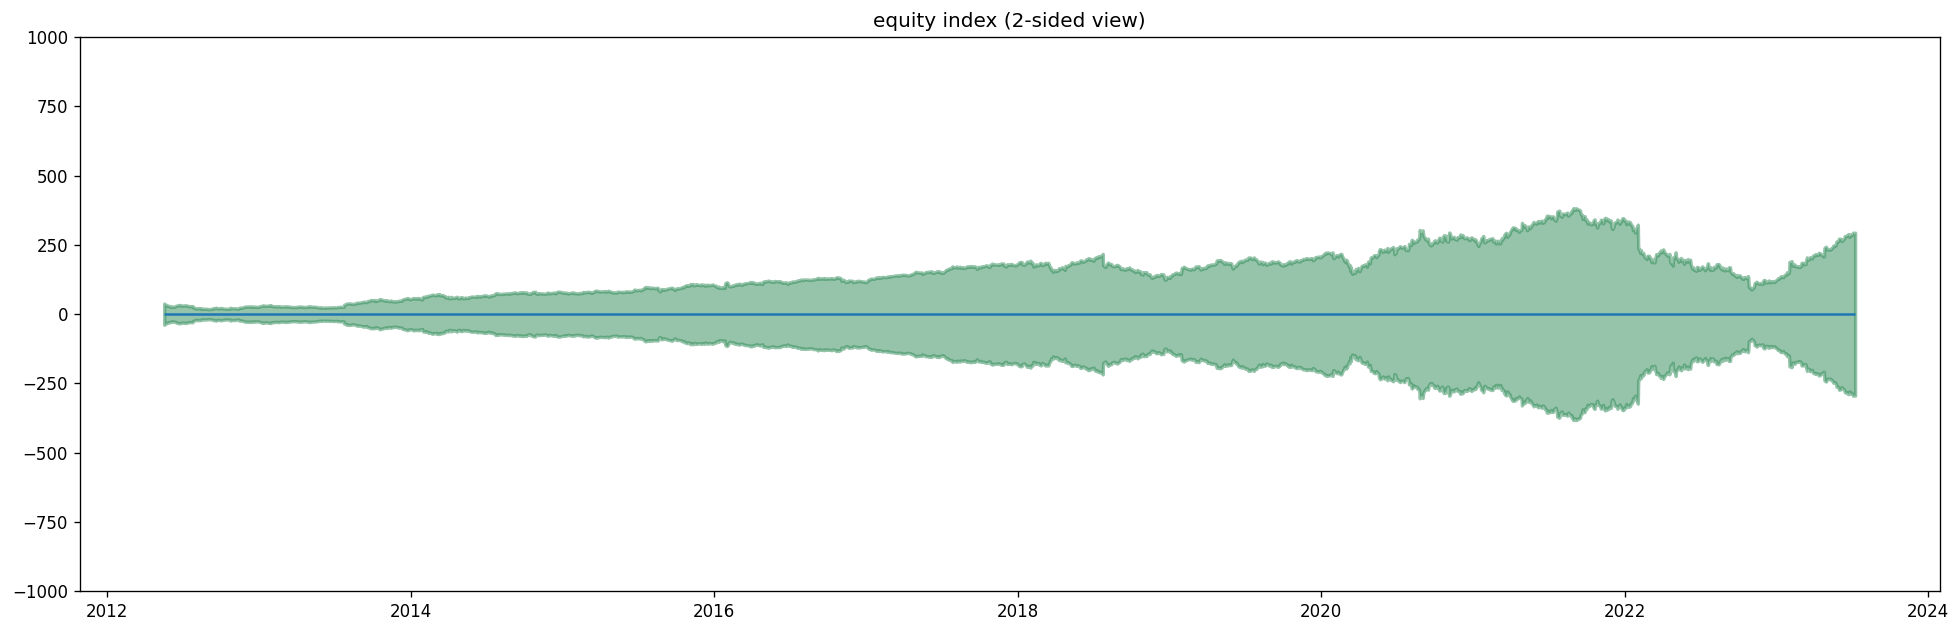

In [ ]:
import matplotlib.pyplot as plt
x = df.index
y = df['Adj Close']

fig, ax = plt.subplots(1,1, figsize=(20,6),dpi=120)
plt.fill_between(x,y1=y,y2=-y,alpha=0.5,linewidth=2,color='seagreen')
plt.ylim(-1000,1000)
plt.title('equity index (2-sided view)')
plt.hlines(y=0 , xmin=np.min(x),xmax = np.max(x))
plt.show()

###Correlation

In [ ]:
px.imshow(df.corr(),text_auto=True)

###Auto-correlation

In [ ]:
import pandas as pd
import plotly.graph_objects as go

correlation_values = [df['Adj Close'].autocorr(lag=i) for i in range(df.shape[0])]

fig = go.Figure(data=[go.Bar(x=list(range(df.shape[0])), y=correlation_values, marker=dict(color='#d62728', opacity=1))])
fig.update_layout(xaxis_title='Lag value(days)', yaxis_title='Correlation percentage')
fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.1,
                  bargroupgap = 0,
                 )
fig.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning:

divide by zero encountered in true_divide



###Decomposition

####Adj Close

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(df['Adj Close'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(df['Adj Close'], model='multiplicative', period=30)
fig = make_subplots(rows=6, cols=1, subplot_titles=['Additive Decomposition: Trend',
                                                    'Additive Decomposition: Seasonality',
                                                    'Additive Decomposition: Residual',
                                                    'Multiplicative Decomposition: Trend',
                                                    'Multiplicative Decomposition: Seasonality',
                                                    'Multiplicative Decomposition: Residual'])
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.trend, name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.seasonal, name='Seasonality'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.resid, name='Residual'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.trend, name='Trend'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.seasonal, name='Seasonality'), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.resid, name='Residual'), row=6, col=1)
fig.update_layout(height=1200, width=800, title_text='MetaStock Price (Adj Close) Decomposition', showlegend=True)
fig.show()

####Open

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(df['Open'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(df['Open'], model='multiplicative', period=30)
fig = make_subplots(rows=6, cols=1, subplot_titles=['Additive Decomposition: Trend',
                                                    'Additive Decomposition: Seasonality',
                                                    'Additive Decomposition: Residual',
                                                    'Multiplicative Decomposition: Trend',
                                                    'Multiplicative Decomposition: Seasonality',
                                                    'Multiplicative Decomposition: Residual'])
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.trend, name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.seasonal, name='Seasonality'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.resid, name='Residual'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.trend, name='Trend'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.seasonal, name='Seasonality'), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.resid, name='Residual'), row=6, col=1)
fig.update_layout(height=1200, width=800, title_text='MetaStock Price (Open) Decomposition', showlegend=True)
fig.show()

####High

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(df['High'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(df['High'], model='multiplicative', period=30)
fig = make_subplots(rows=6, cols=1, subplot_titles=['Additive Decomposition: Trend',
                                                    'Additive Decomposition: Seasonality',
                                                    'Additive Decomposition: Residual',
                                                    'Multiplicative Decomposition: Trend',
                                                    'Multiplicative Decomposition: Seasonality',
                                                    'Multiplicative Decomposition: Residual'])
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.trend, name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.seasonal, name='Seasonality'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.resid, name='Residual'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.trend, name='Trend'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.seasonal, name='Seasonality'), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.resid, name='Residual'), row=6, col=1)
fig.update_layout(height=1200, width=800, title_text='MetaStock Price (High) Decomposition', showlegend=True)
fig.show()

####Low

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(df['Low'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(df['Low'], model='multiplicative', period=30)
fig = make_subplots(rows=6, cols=1, subplot_titles=['Additive Decomposition: Trend',
                                                    'Additive Decomposition: Seasonality',
                                                    'Additive Decomposition: Residual',
                                                    'Multiplicative Decomposition: Trend',
                                                    'Multiplicative Decomposition: Seasonality',
                                                    'Multiplicative Decomposition: Residual'])
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.trend, name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.seasonal, name='Seasonality'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.resid, name='Residual'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.trend, name='Trend'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.seasonal, name='Seasonality'), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.resid, name='Residual'), row=6, col=1)
fig.update_layout(height=1200, width=800, title_text='MetaStock Price (Low) Decomposition', showlegend=True)
fig.show()

####Volume

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
additive_decomposition = seasonal_decompose(df['Volume'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(df['Volume'], model='multiplicative', period=30)
fig = make_subplots(rows=6, cols=1, subplot_titles=['Additive Decomposition: Trend',
                                                    'Additive Decomposition: Seasonality',
                                                    'Additive Decomposition: Residual',
                                                    'Multiplicative Decomposition: Trend',
                                                    'Multiplicative Decomposition: Seasonality',
                                                    'Multiplicative Decomposition: Residual'])
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.trend, name='Trend'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.seasonal, name='Seasonality'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=additive_decomposition.resid, name='Residual'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.trend, name='Trend'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.seasonal, name='Seasonality'), row=5, col=1)
fig.add_trace(go.Scatter(x=df.index, y=multiplicative_decomposition.resid, name='Residual'), row=6, col=1)
fig.update_layout(height=1200, width=800, title_text='MetaStock Price (Volume) Decomposition', showlegend=True)
fig.show()

multiplicative is better

###Augmented dicky-fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf= adfuller(df['Adj Close'],autolag='AIC')

In [ ]:
output_df= pd.DataFrame({"Values":[adf[0],adf[1],adf[2],adf[3],adf[4]['1%'],adf[4]['5%'],adf[4]['10%']],
                         "Metrics":["Test statistic","p-value","usedlag","No.of observations","critical_values(1%)","critical_values(5%)","critical_values(10%)"]})

In [ ]:
output_df

Values               Metrics
0    -1.230114        Test statistic
1     0.660509               p-value
2    21.000000               usedlag
3  2780.000000    No.of observations
4    -3.432704   critical_values(1%)
5    -2.862580   critical_values(5%)
6    -2.567324  critical_values(10%)

Hence non-stationary data

###Granger-Causality-test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

variables = ['Open', 'High', 'Low', 'Volume']

for variable in variables:
    print(variable)
    result = grangercausalitytests(df[['Adj Close', variable]], maxlag=2)
    print(f"Granger causality test results for 'Adj Close' and '{variable}':")
    print(result)
    print()


Open

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8154  , p=0.0935  , df_denom=2798, df_num=1
ssr based chi2 test:   chi2=2.8184  , p=0.0932  , df=1
likelihood ratio test: chi2=2.8170  , p=0.0933  , df=1
parameter F test:         F=2.8154  , p=0.0935  , df_denom=2798, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2800  , p=0.1025  , df_denom=2795, df_num=2
ssr based chi2 test:   chi2=4.5681  , p=0.1019  , df=2
likelihood ratio test: chi2=4.5644  , p=0.1021  , df=2
parameter F test:         F=2.2800  , p=0.1025  , df_denom=2795, df_num=2
Granger causality test results for 'Adj Close' and 'Open':
{1: ({'ssr_ftest': (2.8154094246711105, 0.09347475282998868, 2798.0, 1), 'ssr_chi2test': (2.8184280909591783, 0.09318762315599555, 1), 'lrtest': (2.81701105913271, 0.09326993849542181, 1), 'params_ftest': (2.8154094246695305, 0.09347475283004564, 2798.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper obj

###Conversion to stationary dataframe

In [ ]:
df = df.loc[df.index <= '2020-12-31']
df_stationary = df.diff().dropna()

print(df_stationary.head())

                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2012-05-21 -5.520000 -8.340000 -5.000000 -4.200001  -4.200001 -405383700.0
2012-05-22 -3.919998 -3.070000 -2.059999 -3.029999  -3.029999  -66406100.0
2012-05-23 -1.240000 -1.090000  0.420000  1.000000   1.000000  -28186600.0
2012-05-24  1.580000  0.709999  0.410000  1.029999   1.029999  -23362800.0
2012-05-25 -0.049999 -0.259998 -0.660000 -1.119999  -1.119999  -13087400.0


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df_stationary.index,
                                     open=df_stationary['Open'],
                                     high=df_stationary['High'],
                                     low=df_stationary['Low'],
                                     close=df_stationary['Close'],
                                     name='S&P 500')])

fig.update_layout(title='Meta Stock data',
                  xaxis_title='Date',
                  yaxis_title='Price')


fig.show()

###Granger-Causality-test with de-trended data

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

variables = ['Open', 'High', 'Low', 'Volume']

for variable in variables:
    print(variable)
    result = grangercausalitytests(df_stationary[['Adj Close', variable]], maxlag=2)
    print(f"Granger causality test results for 'Adj Close' and '{variable}':")
    print(result)
    print()

Open

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1686  , p=0.6814  , df_denom=2165, df_num=1
ssr based chi2 test:   chi2=0.1688  , p=0.6812  , df=1
likelihood ratio test: chi2=0.1688  , p=0.6812  , df=1
parameter F test:         F=0.1686  , p=0.6814  , df_denom=2165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4822  , p=0.0309  , df_denom=2162, df_num=2
ssr based chi2 test:   chi2=6.9806  , p=0.0305  , df=2
likelihood ratio test: chi2=6.9694  , p=0.0307  , df=2
parameter F test:         F=3.4822  , p=0.0309  , df_denom=2162, df_num=2
Granger causality test results for 'Adj Close' and 'Open':
{1: ({'ssr_ftest': (0.16855687435479927, 0.6814381835517065, 2165.0, 1), 'ssr_chi2test': (0.16879044046245026, 0.6811890262013889, 1), 'lrtest': (0.16878387018368812, 0.6811948899116125, 1), 'params_ftest': (0.1685568743551379, 0.681438183551277, 2165.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper obj

###SMA

####Optimization

In [ ]:
best_pnl = float('-inf')
best_time_periods = None

for i in range(10, 20):
    for j in range(15, 30):
        sma_i = talib.SMA(df_stationary['Adj Close'], timeperiod=i)
        sma_j = talib.SMA(df_stationary['Adj Close'], timeperiod=j)
        signal = pd.Series(np.sign(sma_i - sma_j))
        pnl = (df_stationary['Adj Close'].diff() * signal.shift(1))
        print(i,",",j,"=")
        print(pnl.dropna().sum())
        if pnl.dropna().sum() > best_pnl:
            best_pnl = pnl.dropna().sum()
            best_time_periods = (i, j)

print("Best P&L:", best_pnl)
print("Best Time Periods for SMA:", best_time_periods)


10 , 15 =
-847.6401023864746
10 , 16 =
-1099.019905090332
10 , 17 =
-1033.279733657837
10 , 18 =
-1217.0701332092285
10 , 19 =
-1222.9299602508545
10 , 20 =
-1231.039789199829
10 , 21 =
-1187.5701904296875
10 , 22 =
-1174.9599857330322
10 , 23 =
-1168.5700664520264
10 , 24 =
-1169.899959564209
10 , 25 =
-1283.699893951416
10 , 26 =
-1223.7298393249512
10 , 27 =
-1317.4598503112793
10 , 28 =
-1215.519920349121
10 , 29 =
-1229.6899318695068
11 , 15 =
-656.2402725219727
11 , 16 =
-1029.3395347595215
11 , 17 =
-750.1396541595459
11 , 18 =
-995.590217590332
11 , 19 =
-980.189920425415
11 , 20 =
-1112.7496166229248
11 , 21 =
-890.2701263427734
11 , 22 =
-906.9099788665771
11 , 23 =
-996.3495426177979
11 , 24 =
-831.1797370910645
11 , 25 =
-887.7798233032227
11 , 26 =
-1015.6495819091797
11 , 27 =
-1113.4999351501465
11 , 28 =
-1110.239730834961
11 , 29 =
-1130.9496250152588
12 , 15 =
-522.2907028198242
12 , 16 =
-792.6399536132812
12 , 17 =
-775.4797229766846
12 , 18 =
-790.0303649902344
12 

In [ ]:
df_stationary['MA']=talib.SMA(df_stationary['Adj Close'],timeperiod=17)
px.line(df_stationary[['MA']])

###EMA

####Optimization

In [ ]:
best_pnl = float('-inf')
best_time_periods = None

for i in range(10, 20):
    for j in range(15, 30):
        ema_i = talib.EMA(df_stationary['Adj Close'], timeperiod=i)
        ema_j = talib.EMA(df_stationary['Adj Close'], timeperiod=j)
        signal = pd.Series(np.sign(ema_i - ema_j))
        pnl = (df_stationary['Adj Close'].diff() * signal.shift(1))
        print(i,",",j,"=")
        print(pnl.dropna().sum())
        if pnl.dropna().sum() > best_pnl:
            best_pnl = pnl.dropna().sum()
            best_time_periods = (i, j)

print("Best P&L:", best_pnl)
print("Best Time Periods for EMA:", best_time_periods)

10 , 15 =
-2852.1599311828613
10 , 16 =
-2799.079978942871
10 , 17 =
-2748.840021133423
10 , 18 =
-2762.809928894043
10 , 19 =
-2723.7698497772217
10 , 20 =
-2704.6298999786377
10 , 21 =
-2664.2698707580566
10 , 22 =
-2680.819772720337
10 , 23 =
-2646.9097270965576
10 , 24 =
-2632.4997634887695
10 , 25 =
-2636.599784851074
10 , 26 =
-2656.889804840088
10 , 27 =
-2656.4997596740723
10 , 28 =
-2642.1598892211914
10 , 29 =
-2623.569917678833
11 , 15 =
-2753.020030975342
11 , 16 =
-2731.8399391174316
11 , 17 =
-2703.959867477417
11 , 18 =
-2723.0898399353027
11 , 19 =
-2674.169855117798
11 , 20 =
-2650.649709701538
11 , 21 =
-2617.929832458496
11 , 22 =
-2615.7798290252686
11 , 23 =
-2619.109857559204
11 , 24 =
-2610.539779663086
11 , 25 =
-2597.8198204040527
11 , 26 =
-2576.8498306274414
11 , 27 =
-2561.159843444824
11 , 28 =
-2601.859817504883
11 , 29 =
-2626.489824295044
12 , 15 =
-2701.979907989502
12 , 16 =
-2718.4398345947266
12 , 17 =
-2660.539842605591
12 , 18 =
-2636.4897689819336

In [ ]:
df_stationary['EMA']=talib.EMA(df_stationary['Adj Close'],timeperiod=17)
px.line(df_stationary[['EMA']])

###WMA

####Optimization

In [ ]:
best_pnl = float('-inf')
best_time_periods = None

for i in range(10, 20):
    for j in range(15, 30):
        wma_i = talib.WMA(df_stationary['Adj Close'], timeperiod=i)
        wma_j = talib.WMA(df_stationary['Adj Close'], timeperiod=j)
        signal = pd.Series(np.sign(wma_i - wma_j))
        pnl = (df_stationary['Adj Close'].diff() * signal.shift(1))
        print(i,",",j,"=")
        print(pnl.dropna().sum())
        if pnl.dropna().sum() > best_pnl:
            best_pnl = pnl.dropna().sum()
            best_time_periods = (i, j)

print("Best P&L:", best_pnl)
print("Best Time Periods for SMA:", best_time_periods)

10 , 15 =
-2041.3000717163086
10 , 16 =
-2149.2202186584473
10 , 17 =
-2131.5400676727295
10 , 18 =
-2140.470241546631
10 , 19 =
-2155.3102626800537
10 , 20 =
-2111.510206222534
10 , 21 =
-2086.390266418457
10 , 22 =
-2160.780122756958
10 , 23 =
-2150.6100101470947
10 , 24 =
-2111.940116882324
10 , 25 =
-2061.520008087158
10 , 26 =
-2087.8099937438965
10 , 27 =
-2083.2799797058105
10 , 28 =
-2085.359951019287
10 , 29 =
-2102.6299724578857
11 , 15 =
-2013.2999382019043
11 , 16 =
-2118.579921722412
11 , 17 =
-2083.300199508667
11 , 18 =
-2046.5902557373047
11 , 19 =
-2044.090196609497
11 , 20 =
-2073.6701946258545
11 , 21 =
-2040.3101959228516
11 , 22 =
-2036.3601398468018
11 , 23 =
-2101.389856338501
11 , 24 =
-2040.039894104004
11 , 25 =
-2108.599754333496
11 , 26 =
-2130.2097396850586
11 , 27 =
-2085.4797325134277
11 , 28 =
-2095.2196655273438
11 , 29 =
-2081.609842300415
12 , 15 =
-1958.7203559875488
12 , 16 =
-1999.6601257324219
12 , 17 =
-2025.6603107452393
12 , 18 =
-2045.51047134

In [ ]:
df_stationary['WMA']=talib.WMA(df_stationary['Adj Close'],timeperiod=18)
px.line(df_stationary[['WMA']])

###RSI

####Optimization

In [ ]:
best_pnl = float('-inf')
best_time_period = None

for i in range(10, 30):
    RSI = talib.RSI(df_stationary['Adj Close'], timeperiod=i)
    signal = pd.Series(0, index=RSI.index)
    signal[(RSI >= 70)] = -1
    signal[(RSI <= 30)] = 1
    signal = signal.shift(1)
    pnl = (df_stationary['Adj Close'].diff() * signal)
    print(i, "=", pnl.dropna().sum())
    if pnl.dropna().sum() > best_pnl:
        best_pnl = pnl.dropna().sum()
        best_time_period = i

print("Best P&L:", best_pnl)
print("Best Time Period:", best_time_period)


10 = 68.13000106811523
11 = 55.81000328063965
12 = 48.07001304626465
13 = 48.07001304626465
14 = 48.07001304626465
15 = 48.07001304626465
16 = 48.07001304626465
17 = 48.07001304626465
18 = 48.07001304626465
19 = 48.07001304626465
20 = 48.07001304626465
21 = 8.200002670288086
22 = 8.200002670288086
23 = 8.200002670288086
24 = 8.200002670288086
25 = 8.200002670288086
26 = 8.200002670288086
27 = 0.0
28 = 0.0
29 = 0.0
Best P&L: 68.13000106811523
Best Time Period: 10


In [ ]:
df_stationary['RSI']=talib.RSI(df_stationary['Adj Close'], timeperiod=10)
px.scatter(df_stationary['RSI'])

###MACD

In [ ]:
import plotly.graph_objects as go
EMA_12 = pd.Series(df_stationary['Close'].ewm(span=12,min_periods=12).mean())
EMA_26 = pd.Series(df_stationary['Close'].ewm(span=26,min_periods=26).mean())
df_stationary['MACD']=pd.Series(EMA_26-EMA_12)
df_stationary['MACD_Signal']=pd.Series(df_stationary['MACD'].ewm(span=9,min_periods=9).mean())

from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.index, y=df_stationary.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df_stationary['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df_stationary['MACD_Signal'], name='Signal line'), row=2, col=1)

fig.show()

###Bollinger Bands

In [ ]:
df_stationary['Upper Band'],df_stationary['Mid Band'],df_stationary['Low Band']=talib.BBANDS(df_stationary['Adj Close'],timeperiod=50)
fig=px.line(df_stationary[['Upper Band','Mid Band','Low Band','Close']])
fig.update_layout(
    title="Bollinger Bands"
)

###Directional Index and ADX

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.interpolate import make_interp_spline

df_stationary['DI+'] = talib.PLUS_DI(df_stationary['High'], df_stationary['Low'], df_stationary['Close'], timeperiod=30)
df_stationary['DI-'] = talib.MINUS_DI(df_stationary['High'], df_stationary['Low'], df_stationary['Close'], timeperiod=30)
df_stationary['ADX'] = talib.ADX(df_stationary['High'], df_stationary['Low'], df_stationary['Close'], timeperiod=30)
df_stationary['DI+'] = df_stationary['DI+'].bfill()
df_stationary['DI-'] = df_stationary['DI-'].bfill()
df_stationary['ADX'] = df_stationary['ADX'].bfill()

data_points = 50
df_sampled = df_stationary[::data_points]
x = np.linspace(0, 1, len(df_sampled.index))
x_smooth = np.linspace(0, 1, data_points * len(df_sampled.index))
spl_DI_plus = make_interp_spline(x, df_sampled['DI+'])
spl_DI_minus = make_interp_spline(x, df_sampled['DI-'])
spl_ADX = make_interp_spline(x, df_sampled['ADX'])
DI_plus_smooth = spl_DI_plus(x_smooth)
DI_minus_smooth = spl_DI_minus(x_smooth)
ADX_smooth = spl_ADX(x_smooth)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_stationary.index, y=df_stationary['DI+'], mode='lines', name='DI+'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_stationary.index, y=df_stationary['DI-'], mode='lines', name='DI-'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_stationary.index, y=df_stationary['ADX'], mode='lines', name='ADX'), secondary_y=False)

fig.add_trace(go.Scatter(x=df_stationary.index, y=DI_plus_smooth, mode='lines', name='Smooth DI+'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_stationary.index, y=DI_minus_smooth, mode='lines', name='Smooth DI-'), secondary_y=False)
fig.add_trace(go.Scatter(x=df_stationary.index, y=ADX_smooth, mode='lines', name='Smooth ADX'), secondary_y=False)

fig.update_layout(
    title="Indexes and Close Value Comparison",
    xaxis_title="Date",
    yaxis_title="Index Value",
)

fig.show()


###P&L

In [ ]:
# df_stationary['P&L']=df_stationary['Close']-df_stationary['Open']

In [ ]:
# px.line(df_stationary['P&L'])

###P&L on basis of close (Day to Day)

In [ ]:
df_stationary['pnl_close']=((df_stationary['Adj Close'].diff())/df_stationary['Adj Close'])*100
px.line(df_stationary['pnl_close'])

###OBV

In [ ]:
df_stationary['OBV']=talib.OBV(df_stationary['Adj Close'],df_stationary['Volume'])
px.line(df_stationary['OBV'])

###Correlation

In [ ]:
px.imshow(df_stationary.corr(),text_auto=True)

#Predictive Models



####Xgboost

In [ ]:
df_stationary=df_stationary.bfill()
df_stationary.head()

Open      High       Low     Close  Adj Close       Volume  \
Date                                                                         
2012-05-21 -5.520000 -8.340000 -5.000000 -4.200001  -4.200001 -405383700.0   
2012-05-22 -3.919998 -3.070000 -2.059999 -3.029999  -3.029999  -66406100.0   
2012-05-23 -1.240000 -1.090000  0.420000  1.000000   1.000000  -28186600.0   
2012-05-24  1.580000  0.709999  0.410000  1.029999   1.029999  -23362800.0   
2012-05-25 -0.049999 -0.259998 -0.660000 -1.119999  -1.119999  -13087400.0   

                  MA       EMA       WMA        RSI      MACD  MACD_Signal  \
Date                                                                         
2012-05-21 -0.644706 -0.644706 -0.116959  58.628204 -0.197527    -0.037585   
2012-05-22 -0.644706 -0.644706 -0.116959  58.628204 -0.197527    -0.037585   
2012-05-23 -0.644706 -0.644706 -0.116959  58.628204 -0.197527    -0.037585   
2012-05-24 -0.644706 -0.644706 -0.116959  58.628204 -0.197527    -0.037585   
2012-05-25 -0.644706 -0.644706 -0.116959  58.628204 -0.197527    -0.037585   

            Upper Band  Mid Band  Low Band        DI+       DI-        ADX  \
Date                                                                         
2012-05-21    2.248793   -0.3304 -2.909593  57.195488  27.37038  19.451017   
2012-05-22    2.248793   -0.3304 -2.909593  57.195488  27.37038  19.451017   
2012-05-23    2.248793   -0.3304 -2.909593  57.195488  27.37038  19.451017   
2012-05-24    2.248793   -0.3304 -2.909593  57.195488  27.37038  19.451017   
2012-05-25    2.248793   -0.3304 -2.909593  57.195488  27.37038  19.451017   

            pnl_close          OBV  
Date                                
2012-05-21  -0.386139 -405383700.0  
2012-05-22  -0.386139 -471789800.0  
2012-05-23   4.029999 -499976400.0  
2012-05-24   0.029125 -523339200.0  
2012-05-25   1.919643 -510251800.0

In [ ]:
df_stationary.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA', 'EMA',
       'WMA', 'RSI', 'MACD', 'MACD_Signal', 'Upper Band', 'Mid Band',
       'Low Band', 'DI+', 'DI-', 'ADX', 'pnl_close', 'OBV'],
      dtype='object')

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

data = df_stationary

features = data.drop(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
target = data['Adj Close']


train_size = int(0.8 * len(data))
train_features, train_target = features[:train_size], target[:train_size]
test_features, test_target = features[train_size:], target[train_size:]


model = xgb.XGBRegressor()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(train_features, train_target)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


ValueError: ignored

In [ ]:
import plotly.graph_objects as go


param_names = list(best_params.keys())
param_values = list(best_params.values())


fig = go.Figure(data=[go.Bar(x=param_names, y=param_values)])


fig.update_layout(title='Best Parameters',
                  xaxis_title='Parameter',
                  yaxis_title='Value')


fig.show()


In [ ]:
model=xgb.XGBRegressor(**best_params)
model.fit(train_features, train_target)

predictions = model.predict(test_features)

importance = model.feature_importances_
feature_names = features.columns

plt.bar(feature_names, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
predictions = model.predict(test_features)
accuracy = r2_score(test_target, predictions)
print("Accuracy (R-squared):", accuracy)
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_target.index, y=test_target, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=test_target.index, y=predictions, mode='lines', name='Predicted'))
fig.update_layout(
    title='Actual vs. Predicted Adj Close',
    xaxis_title='Index',
    yaxis_title='Adj Close'
)
fig.show()


In [ ]:
df=yf.download('META')

In [ ]:
df_final=pd.DataFrame()
df_temp=df[df.index < '2020-12-31']
df_final['Actual_Adj_close']=df_temp['Adj Close']
X=df_stationary[['MA', 'EMA','WMA', 'RSI', 'MACD', 'MACD_Signal', 'Upper Band', 'Mid Band','Low Band', 'DI+', 'DI-', 'ADX', 'P&L','pnl_close', 'OBV']]
y=df_stationary['Adj Close']
pred=model.predict(X)
df_final['Prediction_of_change'] = pred

In [ ]:
df_stationary

In [ ]:
df_final

In [ ]:
predicted_price = df_final['Actual_Adj_close'].iloc[-1] + df_final['Prediction_of_change'].iloc[-1]
last_date = df_final.index[-1]
predicted_date = last_date + pd.DateOffset(days=1)
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df_final.index,
    y=df_final['Actual_Adj_close'],
    mode='lines',
    name='Actual Prices'
))


fig.add_trace(go.Scatter(
    x=[predicted_date],
    y=[predicted_price],
    mode='markers',
    name='Predicted Price',
    marker=dict(
        size=10,
        color='red'
    )
))
fig.add_trace(go.Scatter(
    x=[last_date, predicted_date],
    y=[df_final['Actual_Adj_close'].iloc[-1], predicted_price],
    mode='lines',
    name='Prediction Line',
    line=dict(
        color='orange',
        dash='dash'
    )
))

fig.update_layout(
    title='Actual Prices and Final Predicted Price',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)


fig.show()

In [ ]:
pred = model.predict(test_features)

In [ ]:
df_final = pd.DataFrame(data={'Prediction':pred , 'Actual':test_target},index=test_features.index)

In [ ]:
r2_score(pred,test_target)

In [ ]:
target

In [ ]:
plt.plot(df_final['Prediction'])
plt.plot(df_final['Actual'])

In [ ]:
df_final['Actual']=df['Adj Close']

In [ ]:
df_final

In [ ]:
df_final = df_final.loc[~((df_final.index >= '2020-03-12') & (df_final.index <= '2020-03-17'))]

In [ ]:
last = df_final['Actual'][0]

In [ ]:
df_final = df_final.drop('2019-04-15')

In [ ]:
df_final

In [ ]:
l=[]
for i in df_final['Prediction']:
  x = last + i
  last=x
  l.append(last)

In [ ]:
df_final['Predicted Price'] = l

In [ ]:
df_final.tail(204)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_final.index, y=df_final['Actual'], name='Actual'))
fig.add_trace(go.Scatter(x=df_final.index, y=df_final['Predicted Price'], name='Predicted Price'))
fig.update_layout(title='Actual vs. Predicted Price',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(df_final['Actual'],df_final['Predicted Price'])